In [71]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import SGDClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

from scipy.stats import sem

In [2]:
#Load the iris dataset from sklearn.datasets
iris = datasets.load_iris()

In [80]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [3]:
#Separate the features (X_iris) and the target (y_iris)
X_iris, y_iris = iris.data, iris.target
print(X_iris.shape, y_iris.shape)
print(X_iris[0], y_iris[0])
print("Feature Names:", iris.feature_names)
print("Target Names:", iris.target_names)

(150, 4) (150,)
[5.1 3.5 1.4 0.2] 0
Feature Names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target Names: ['setosa' 'versicolor' 'virginica']


In [4]:
#Split the training data into 
X,y = X_iris[:,:2], y_iris
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=33)
print(X_train.shape, y_train.shape)

(112, 2) (112,)


In [5]:
#Scale features to have mean 0 and standard deviation 1
scaler = preprocessing.StandardScaler().fit(X_train)
X_train=scaler.transform(X_train)
X_test = scaler.transform(X_test)

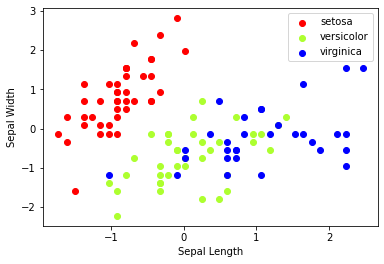

In [6]:
#Visualizing our data
colors = ['red', 'greenyellow', 'blue']
for i in range(len(colors)):
    xs = X_train[:,0][y_train==i]
    ys = X_train[:,1][y_train==i]
    plt.scatter(xs, ys, c=colors[i])
    plt.legend(iris.target_names)
    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal Width')
    

In [16]:
clf = SGDClassifier()
clf.fit(X_train, y_train)
print(clf.coef_)

[[-32.11200349  15.48082462]
 [ -2.73754787  -6.22815674]
 [ 10.8072386    0.72435468]]


In [17]:
print(clf.intercept_)

[-19.73645228  -0.06010706  -5.60386102]


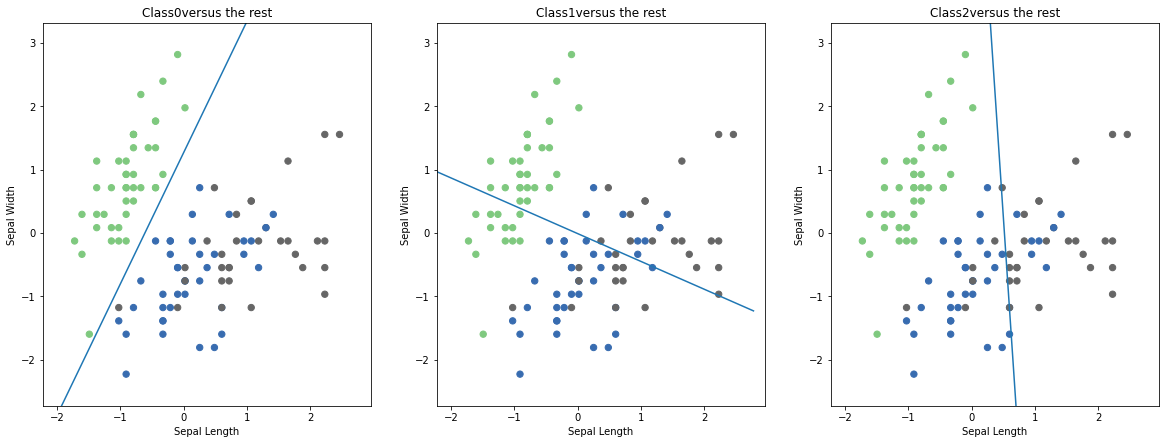

In [18]:
x_min, x_max = X_train[:,0].min()-0.5, X_train[:,0].max()+0.5
y_min, y_max = X_train[:,1].min()-0.5, X_train[:,1].max()+0.5
xs = np.arange(x_min,x_max, 0.5)
fig, axes = plt.subplots(1,3)
fig.set_size_inches(20,12)
for i in [0,1,2]:
    axes[i].set_aspect('equal')
    axes[i].set_title('Class'+str(i)+'versus the rest')
    axes[i].set_xlim(x_min, x_max)
    axes[i].set_ylim(y_min, y_max)
    axes[i].set_xlabel('Sepal Length')
    axes[i].set_ylabel('Sepal Width')
    plt.sca(axes[i])
    plt.scatter(X_train[:,0], X_train[:,1], c = y_train, cmap = plt.cm.Accent, s=40)
    ys = (-clf.intercept_[i]-xs*clf.coef_[i][0])/(clf.coef_[i][1])
    plt.plot(xs,ys)
    

In [25]:
#Use the model to predict a label for the data point (4.7,3). Make sure to normalize it first! 
#The predict function simply picks the label for which the score is highest.
print(clf.predict(scaler.transform([[4.7,3]])))
print(clf.decision_function(scaler.transform([[4.7,3]])))

[0]
[[ 18.76128987   4.17129449 -19.30671228]]


In [34]:
#Test the accuracy of the model's predictions on the training set.
y_train_pred = clf.predict(X_train)
print('Training Set Accuracy:', metrics.accuracy_score(y_train, y_train_pred))

Training Set Accuracy: 0.8392857142857143


In [35]:
#Test the accuracy of the model's predictions on the test set.
y_test_pred = clf.predict(X_test)
print("Test Set Accuracy:", metrics.accuracy_score(y_test, y_test_pred))


Test Set Accuracy: 0.6842105263157895


In [42]:
#Let's print more precise metrics of this model's prediction on the test set
print(metrics.classification_report(y_test,y_test_pred, target_names = iris.target_names))
#We see below that the classifier works REALLY well for setosa but suffers for virginica and even worse for versicolor

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         8
  versicolor       0.46      0.55      0.50        11
   virginica       0.71      0.63      0.67        19

    accuracy                           0.68        38
   macro avg       0.72      0.73      0.72        38
weighted avg       0.70      0.68      0.69        38



In [44]:
#Another metric to check is the confusion matrix. 
#The (i,j)-th entry of this matrix describes the number of  instances of class i that are classified as class j.
#A perfect prediction corresponds to a diagonal matrix.
print(metrics.confusion_matrix(y_test, y_test_pred))
#We see that all predictions involving true setosa and predicted setosa are consistent.

[[ 8  0  0]
 [ 0  6  5]
 [ 0  7 12]]


In [61]:
clf = Pipeline([('scaler', StandardScaler()), ('linear_model', SGDClassifier())])

In [69]:
cv = KFold(n_splits= 5, shuffle=True, random_state=33)
scores = cross_val_score(clf, X,y, cv=cv)

In [70]:
scores

array([0.76666667, 0.73333333, 0.66666667, 0.7       , 0.56666667])

In [78]:
def mean_score(scores):
    return ("Mean Score:{0:.3f} (+/-{1:.3f})").format(np.mean(scores),sem(scores))
print(mean_score(scores))

Mean Score:0.687 (+/-0.034)
